In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./Documents/Concatenated_Data_For_Study.csv')

In [16]:
formula = ('is_increased ~ cr_smell_lack_of_cr + cr_smell_ping_pong + cr_smell_sleeping_reviews + cr_smell_missing_context + cr_smell_large_changesets + cr_smell_review_buddies')
model = logit(formula = formula, data = df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.307336
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           is_increased   No. Observations:                10814
Model:                          Logit   Df Residuals:                    10807
Method:                           MLE   Df Model:                            6
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.1043
Time:                        22:04:18   Log-Likelihood:                -3323.5
converged:                       True   LL-Null:                       -3710.4
Covariance Type:            nonrobust   LLR p-value:                7.263e-164
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.5009      0.056    -44.679      0.000      -2.

In [6]:
# Odds ratio
print(np.exp(model.params))

Intercept                    0.082009
cr_smell_lack_of_cr          0.624039
cr_smell_ping_pong           2.622482
cr_smell_sleeping_reviews    1.033660
cr_smell_missing_context     0.573258
cr_smell_large_changesets    5.190871
cr_smell_review_buddies      1.109071
dtype: float64


In [7]:
# Marginal effects computation
AME = model.get_margeff(at = 'overall', method = 'dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:           is_increased
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cr_smell_lack_of_cr          -0.0411      0.010     -4.054      0.000      -0.061      -0.021
cr_smell_ping_pong            0.0841      0.006     14.013      0.000       0.072       0.096
cr_smell_sleeping_reviews     0.0029      0.007      0.406      0.685      -0.011       0.017
cr_smell_missing_context     -0.0485      0.007     -6.866      0.000      -0.062      -0.035
cr_smell_large_changesets     0.1437      0.007     19.449      0.000       0.129       0.158
cr_smell_review_buddies       0.0090      0.006      1.421      0.155      -0.003       0.021


<AxesSubplot: xlabel='cr_smell_lack_of_cr', ylabel='is_increased'>

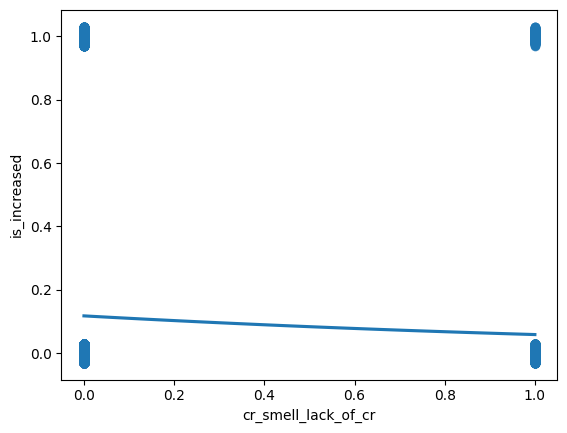

In [10]:
sns.regplot(x = "cr_smell_lack_of_cr", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

<AxesSubplot: xlabel='cr_smell_ping_pong', ylabel='is_increased'>

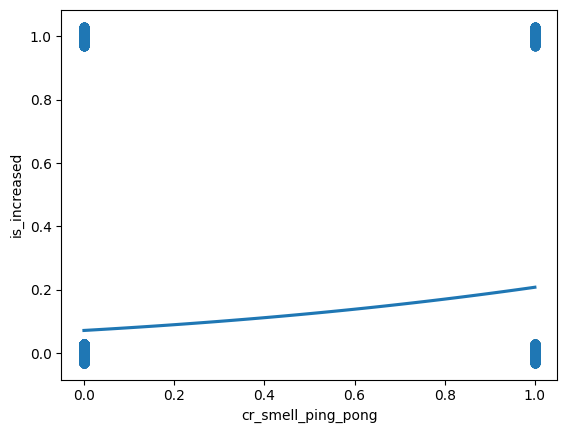

In [11]:
sns.regplot(x = "cr_smell_ping_pong", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

<AxesSubplot: xlabel='cr_smell_sleeping_reviews', ylabel='is_increased'>

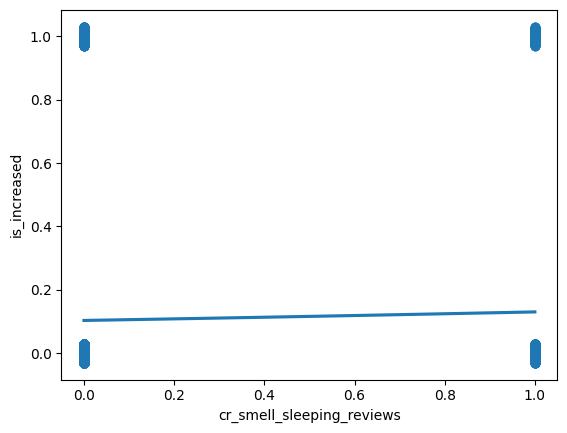

In [12]:
sns.regplot(x = "cr_smell_sleeping_reviews", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

<AxesSubplot: xlabel='cr_smell_missing_context', ylabel='is_increased'>

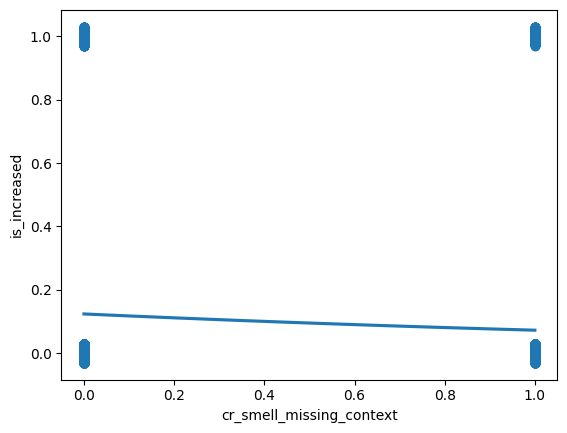

In [13]:
sns.regplot(x = "cr_smell_missing_context", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

<AxesSubplot: xlabel='cr_smell_large_changesets', ylabel='is_increased'>

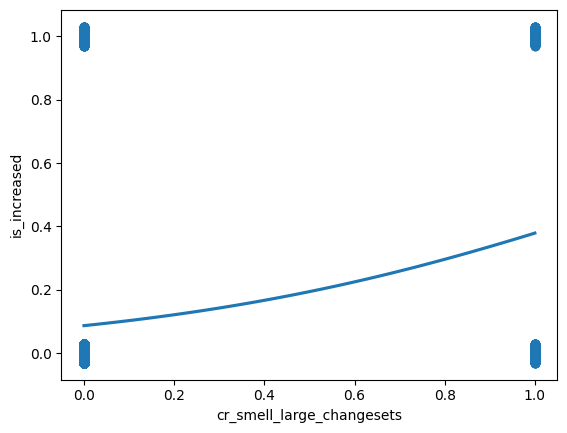

In [14]:
sns.regplot(x = "cr_smell_large_changesets", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

<AxesSubplot: xlabel='cr_smell_review_buddies', ylabel='is_increased'>

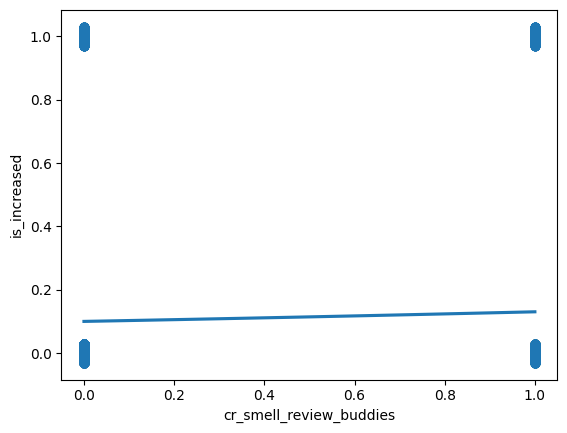

In [15]:
sns.regplot(x = "cr_smell_review_buddies", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

In [31]:
# Weighted model

feature_cols = ['cr_smell_lack_of_cr', 'cr_smell_ping_pong', 'cr_smell_sleeping_reviews', 'cr_smell_missing_context', 'cr_smell_large_changesets', 'cr_smell_review_buddies']
X = df[feature_cols]
y = df.is_increased

logreg = LogisticRegression(class_weight = 'balanced')

# fit the model with data
clf = logreg.fit(X, y)

print(clf.coef_, clf.intercept_)

[[-0.41757418  0.95523446  0.12410196 -0.60843493  1.66147019  0.15275011]] [-0.41745613]
